In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://datahub.io/core/covid-19/r/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

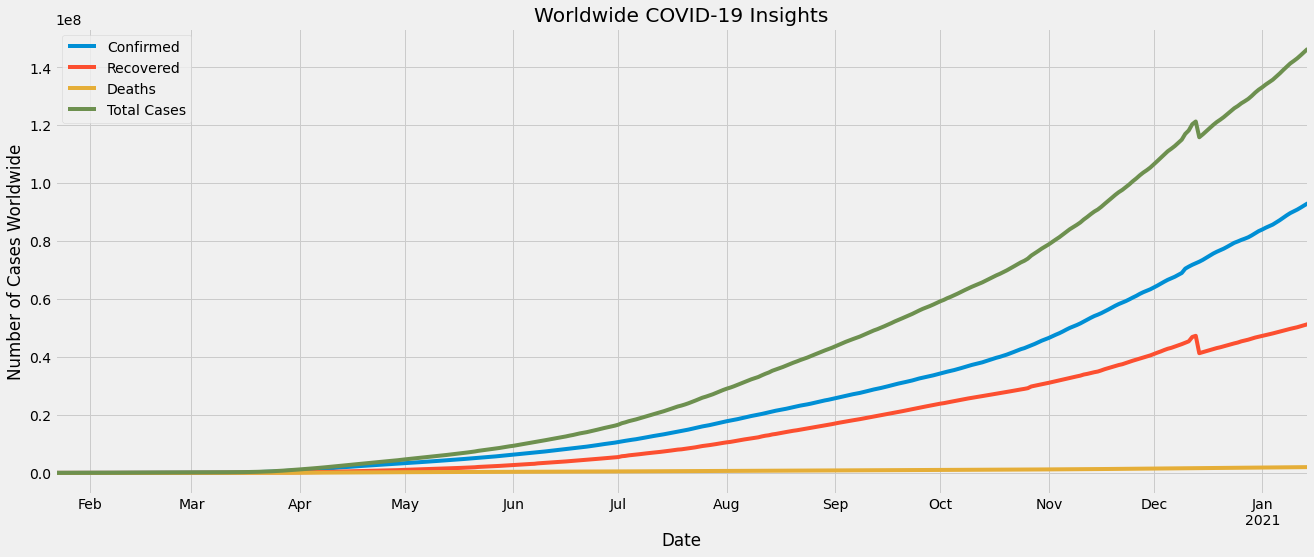

In [35]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(20, 8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()